# code for scatter plot

In [1]:
import pandas as pd

def makeCsv(year = '2015', file_name = 'test.csv'):
    # start by reading in the information we need, category, date and district  
    df = pd.read_csv('SFPD_Incidents_-_from_1_January_2003.csv', usecols=[1,4,6])
    
    # here we isolate out the year we are investigating
    s = df['Date'].apply(lambda x: x.split('/'))
    df['Year']  = s.apply(lambda x: x[2])
    df = df[df['Year'] == year] 
    
    # here we isolate the prostitution and vehicle from the category, and add a new line
    # which has the value 1 if the crime is prostitution and 0 if its vehcicle theft
    df = df.loc[df['Category'].isin(['PROSTITUTION', 'VEHICLE THEFT'])]
    crimeFreq = df.groupby(['PdDistrict', 'Category']).size().reset_index(name="Frequency")
    crimeFreq['is_prost'] =  crimeFreq['Category'].apply(lambda x:1  if x=='PROSTITUTION' else 0)
    
    # here we make a list out of our pandas table where the frequence is the frequency of a 
    # all the crimes, and is_prost tells us if the crime is prostitution or not (then vhecile theft)
    # then we find all the "unique" districts by taking a set of the distrits from the pandas table, and then
    # we turn it back into list
    frequency= list(crimeFreq.Frequency)
    is_prost = list(crimeFreq.is_prost)
    district = list(set(list(crimeFreq.PdDistrict)))
    
    # here we make a list of the frequency of all the prostitution crimes and the theft
    prost = [frequency[i]*is_prost[i] for i in range(len(is_prost)) if is_prost[i] == 1]
    theft = [frequency[i] for i in range(len(is_prost)) if is_prost[i] == 0]
    
    if len(prost) == len(theft) and len(theft) == len(district):
        # this means that prostitution and vhicle theft happen in all the districts
        # so we can translate the data to pandast and make the csv file!
        # translate it tp a pandas table and then make the csv file!
        dist_crimes_num = pd.DataFrame(
            {
                'District': district,
                'VEHICLE THEFT': theft,
                'PROSTITUTION': prost
            })
        dist_crimes_num.to_csv(file_name)
        print "you have succesfully made a csv file for the year: " + year +" saved in your current folder as: " + file_name

    
    else:
        if len(prost) > len(theft):
            print "error, vhicle theft does not happen in all the districts prostitution happens"
        elif len(prost) < len(theft):
            print "error, prostitution does not happen in all the districts that vhecile theft happens"
        else:
            print "neather vhicle nor prostitution happens in all the districts, do somthing about it)"

       
#lets make the files    
makeCsv(year = '2015', file_name = 'data_2015.csv')
makeCsv(year = '2003', file_name = 'data_2003.csv')

you have succesfully made a csv file for the year: 2015 saved in your current folder as: data_2015.csv
you have succesfully made a csv file for the year: 2003 saved in your current folder as: data_2003.csv


# From assignment 5

In [3]:
import pandas as pd
from geoplotlib.utils import read_csv, BoundingBox, DataAccessObject
df = pd.read_csv("SFPD_Incidents_-_from_1_January_2003.csv")
df = df[df['Category'] == "PROSTITUTION"]
lat = list(df["Y"])
lon = list(df["X"])

prostitution_location ={
    "lat": [],
    "lon": []
}

for i in range(len(lat)):
    if float(lat[i]) < 90.00:
        prostitution_location["lat"].append(lat[i])
        prostitution_location["lon"].append(lon[i])



# Plot the the prostituion data points up on geoplot
max_lat = max(prostitution_location["lat"]) 
min_lat = min(prostitution_location["lat"])
max_lon = max(prostitution_location["lon"])
min_lon = min(prostitution_location["lon"])

# Plotting up the image   
bbox = BoundingBox(north=max_lat, west=min_lon, south=min_lat, east=max_lon)
geoplotlib.set_bbox(bbox)
geoplotlib.kde(prostitution_location,1)
geoplotlib.inline() 


('smallest non-zero count', 3.5821272169543856e-08)
('max count:', 188.34536444324578)


In [4]:
# k mean from 2-10
from sklearn.cluster import KMeans

k_sequence = list(map(lambda x: x+2, range(9)))
k_means_error = []
location = zip(prostitution_location["lat"], prostitution_location["lon"])
for k in k_sequence:
    k_means = KMeans(n_clusters=k, random_state=0)
    k_means.fit(location)
    k_means_error.append(k_means.inertia_)
     

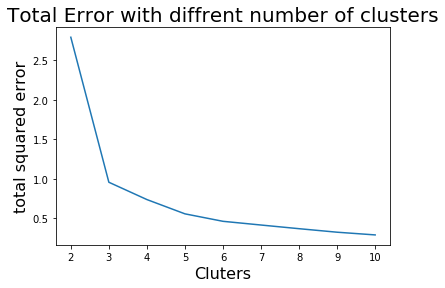

In [5]:
# Let´s plot this up to see
import matplotlib.pyplot as plt

plt.plot(k_sequence,k_means_error)
plt.ylabel("total squared error", fontsize = 16)
plt.xlabel("Cluters", fontsize = 16)
plt.title("Total Error with diffrent number of clusters", fontsize = 20)
plt.show()

# FIND K-MEANS FOR PROJECT 2

In [ ]:
import pandas as pd

df = pd.read_csv("SFPD_Incidents_-_from_1_January_2003.csv")
df = df[df['Category'] == "PROSTITUTION"]
lat = list(df["Y"])
lon = list(df["X"])

prostitution_location ={
    "lat": [],
    "lon": []
}

for i in range(len(lat)):
    if float(lat[i]) < 90.00:
        prostitution_location["lat"].append(lat[i])
        prostitution_location["lon"].append(lon[i])
        


In [ ]:
from sklearn.cluster import KMeans
import json

k_sequence = list(map(lambda x: x+2, range(5)))
location = zip(prostitution_location["lat"], prostitution_location["lon"])

for k in k_sequence:
    k_means = KMeans(n_clusters=k, random_state=0)
    k_means.fit(location)
    
    labels = k_means.labels_.tolist()
    centroid = k_means.cluster_centers_
    centroid_lat = []
    centroid_lon = []
    for cordinates in centroid:
        centroid_lat.append(cordinates[0])
        centroid_lon.append(cordinates[1])
    k_mean_attributes ={
     'centroid_lat': centroid_lat,
     'centroid_lon': centroid_lon,
     'labels': labels,
     'lat':prostitution_location["lat"],
     'lon':prostitution_location["lon"]
    }
    k_mean_attributes = json.dumps(k_mean_attributes)
    file_name = "data_" +str(k)+ ".json"
    with open(file_name, 'w') as outfile:
        json.dump(k_mean_attributes, outfile)
    